# Thanarit Kanjanametawat ID: 6410322 Assignment 4: Clustering

# 1. Read the data

## 1.1 Importing Libraries and Read Dataset

In [58]:
original_data = pd.read_csv('datasets_skewed.txt', sep=" ", header=None)
original_data.columns = ["x1", "x2"]
original_data.head()

,x1,x2
0,1691,1290
1,1647,1485
2,1468,1267
3,2069,1868
4,2414,1728


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read txt file
skewed_data = pd.read_csv('datasets_skewed.txt', sep=" ", header=None)
skewed_data.columns = ["x1", "x2"]
skewed_data.head()

,x1,x2
0,1691,1290
1,1647,1485
2,1468,1267
3,2069,1868
4,2414,1728


## 1.2 Visualize the data

In [35]:
skewed_data.shape

(1000, 2)

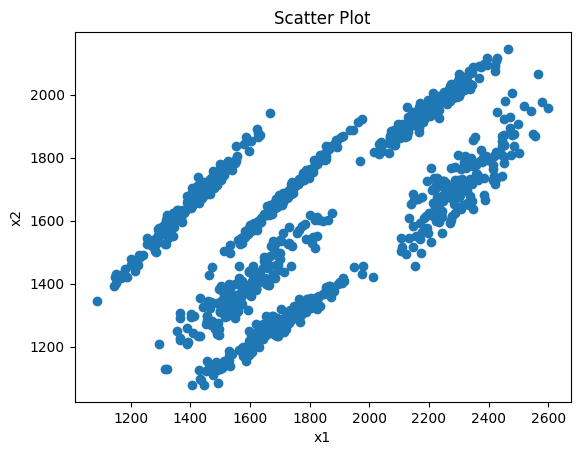

In [36]:
plt.scatter(skewed_data.iloc[:,0], skewed_data.iloc[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.show()

## 1.3 Normalize the data

In [37]:
from sklearn.preprocessing import StandardScaler
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1 (z-score normalization)
scaler = StandardScaler()
skewed_data = scaler.fit_transform(skewed_data)
skewed_data = pd.DataFrame(skewed_data)
skewed_data.columns = ["x1", "x2"]
skewed_data.head()

,x1,x2
0,-0.362323,-1.249332
1,-0.487569,-0.484692
2,-0.997093,-1.339520
3,0.713655,1.017140
4,1.695699,0.468168


### Even after normalization, the data has the same general shape

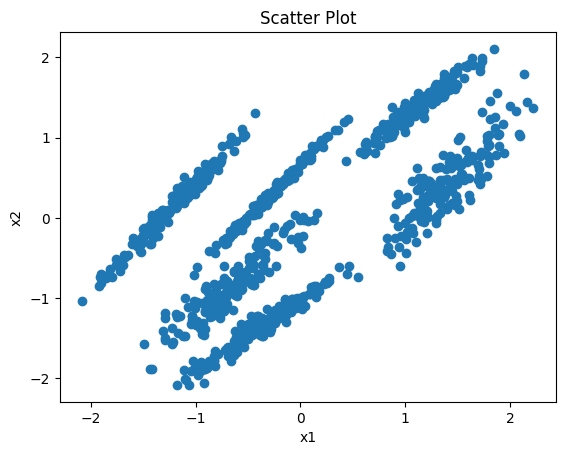

In [38]:
plt.scatter(skewed_data.iloc[:,0], skewed_data.iloc[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.show()

## 1.4 Prepare a function to visualize the clusters

In [62]:
def show_clusters(data, labels):
    plt.scatter(data.iloc[:,0], data.iloc[:,1], c=labels, cmap='Paired')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Clusters')
    plt.show()

def show_clusters_original_data(data, labels):
    global original_data

    # Join the labels to the original data
    original_data['clusters'] = labels
    
    # Plot the clusters
    plt.scatter(original_data.iloc[:,0], original_data.iloc[:,1], c=original_data['clusters'], cmap='rainbow')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Clusters')
    plt.show()

# 2. Perform DBSCAN Clustering

## 2.1. Find the best epsilon and min_samples

Silhouette score for eps =  0.01 and min_samples =  1 is 0.10201747963326344
Silhouette score for eps =  0.01 and min_samples =  2 is -0.6368365217437972
Silhouette score for eps =  0.01 and min_samples =  3 is -0.4971389371969427
Silhouette score for eps =  0.02 and min_samples =  1 is 0.20724005611263782
Silhouette score for eps =  0.02 and min_samples =  2 is -0.2699737868512338
Silhouette score for eps =  0.02 and min_samples =  3 is -0.5370544165952531
Silhouette score for eps =  0.02 and min_samples =  4 is -0.6221738400749912
Silhouette score for eps =  0.02 and min_samples =  5 is -0.5918384320896428
Silhouette score for eps =  0.02 and min_samples =  6 is -0.4205424903803361
Silhouette score for eps =  0.03 and min_samples =  1 is 0.1920116076220901
Silhouette score for eps =  0.03 and min_samples =  2 is -0.054967347288754125
Silhouette score for eps =  0.03 and min_samples =  3 is -0.23614969830857974
Silhouette score for eps =  0.03 and min_samples =  4 is -0.39056506251000

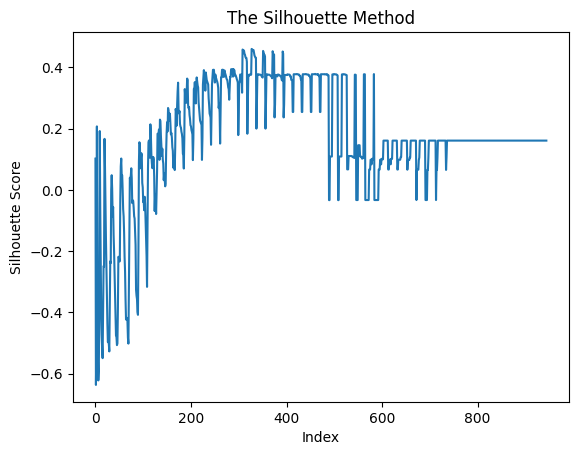

In [40]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

eps_values = []
min_samples_values = []
silhouette_scores = []

for eps in range(1, 1000):
    for min_samples in range(1, 20):
        dbscan = DBSCAN(eps=eps/100, min_samples=min_samples)
        dbscan.fit(skewed_data)
        Y = dbscan.fit_predict(skewed_data)
        try:
            score = metrics.silhouette_score(skewed_data, Y)
        except:
            continue
        # Keep track of eps and min_samples values for 3D plot
        eps_values.append(eps)
        min_samples_values.append(min_samples)
        silhouette_scores.append(score)
        
        print("Silhouette score for eps = ", eps/100, "and min_samples = ", min_samples, "is", score)

plt.plot(range(0, len(silhouette_scores)), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Index')
plt.ylabel('Silhouette Score')
plt.show()
maxscore = max(silhouette_scores)

In [41]:
print("The best eps is", eps_values[silhouette_scores.index(maxscore)]/100)
print("The best min_samples is", min_samples_values[silhouette_scores.index(maxscore)])
print("The best Silhouette Score is", maxscore)

The best eps is 0.2
The best min_samples is 10
The best Silhouette Score is 0.4602263250428606


## 2.2. Perform DBSCAN

Number of clusters: 6
Silhouette Score: 0.4602263250428606


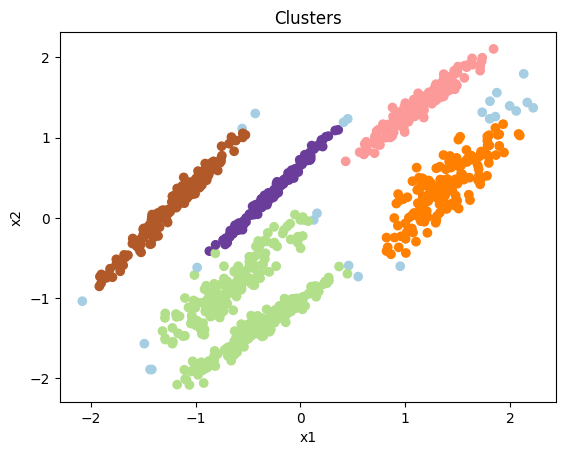

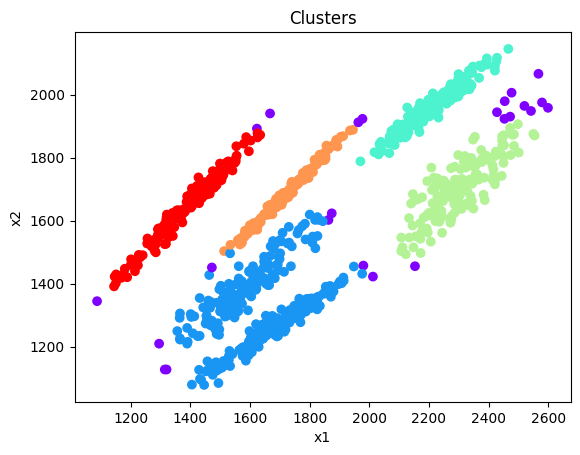

In [92]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(skewed_data)

print(f"Number of clusters: {len(np.unique(dbscan.labels_))}\nSilhouette Score: {metrics.silhouette_score(skewed_data, dbscan.labels_)}")
Y = dbscan.fit_predict(skewed_data)
show_clusters(skewed_data, Y)
show_clusters_original_data(skewed_data, Y)

### For DBSCAN, the best eps is 0.2 and the best min_samples is 10 since these 2 combinations give the highest Silhouette Score. The number of clusters is 6 and according to the plot aove, we can see that there are 4 clusters that is well seperated, the blue cluster is also well seperated despite grouping 2 groups of data together. The purple cluster is likely to be a noise cluster where the data points are all over the places.

# 3. Perform K-Means Clustering

## 3.1 Find the best k

D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

WCSS for k =  2 is 686.662108936155
WCSS for k =  3 is 395.03749145451286
WCSS for k =  4 is 305.54739928758215
WCSS for k =  5 is 230.23340642822882
WCSS for k =  6 is 189.3038957251021
WCSS for k =  7 is 163.4541567348879
WCSS for k =  8 is 143.52334036068427
WCSS for k =  9 is 119.50872928318213
WCSS for k =  10 is 102.07321642402181
WCSS for k =  11 is 87.67985171927099
WCSS for k =  12 is 78.70163570759436
WCSS for k =  13 is 71.45329583780929
WCSS for k =  14 is 64.8848864430551
WCSS for k =  15 is 58.46345180169476
WCSS for k =  16 is 52.885611577310996
WCSS for k =  17 is 48.55030092289837
WCSS for k =  18 is 45.27766494710267
WCSS for k =  19 is 41.01173098459195
WCSS for k =  20 is 38.409873666832254
WCSS for k =  21 is 35.19682311184166
WCSS for k =  22 is 32.63473238881359
WCSS for k =  23 is 30.89308824141929
WCSS for k =  24 is 28.72737408660252
WCSS for k =  25 is 27.101892921595535
WCSS for k =  26 is 25.267626482445063
WCSS for k =  27 is 24.449064735775945
WCSS for k 

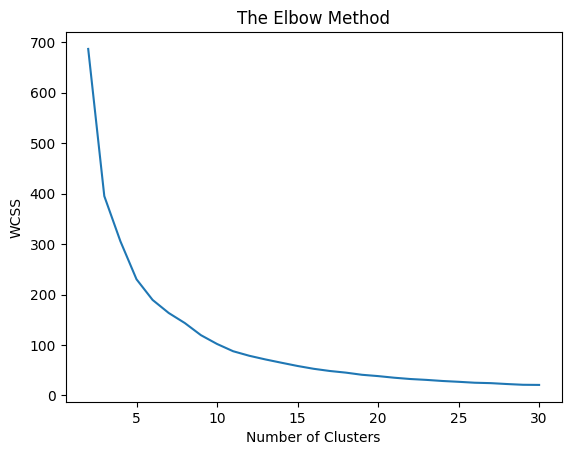

In [64]:
# Print Values of WCSS and Plit WCSS and k
wcss = []
for i in range(2,31):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(skewed_data)
    wcss.append(kmeans.inertia_)

for k in range(0, len(wcss)):
    print("WCSS for k = ", k+2, "is", wcss[k])
import matplotlib.pyplot as plt
plt.plot(range(2,31), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### According to the Elbow Method, the best k should approximately be 8-13 (the elbow point)

D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Silhouette score for k =  2 is 0.5681216455919553
Silhouette score for k =  3 is 0.5271055052284007
Silhouette score for k =  4 is 0.4969189199505679
Silhouette score for k =  5 is 0.49184483486978536
Silhouette score for k =  6 is 0.44221366942365037
Silhouette score for k =  7 is 0.42035697217774803
Silhouette score for k =  8 is 0.4409690766413374
Silhouette score for k =  9 is 0.4588264982674079
Silhouette score for k =  10 is 0.46505609383400903
Silhouette score for k =  11 is 0.4726277952976411
Silhouette score for k =  12 is 0.4752395648607795
Silhouette score for k =  13 is 0.46785084494889123
Silhouette score for k =  14 is 0.47169301900731053
Silhouette score for k =  15 is 0.4638711618334513
Silhouette score for k =  16 is 0.46904519363470515
Silhouette score for k =  17 is 0.4666912136602079
Silhouette score for k =  18 is 0.4667652221957509
Silhouette score for k =  19 is 0.478499802123591
Silhouette score for k =  20 is 0.46050319455870614
Silhouette score for k =  21 is 

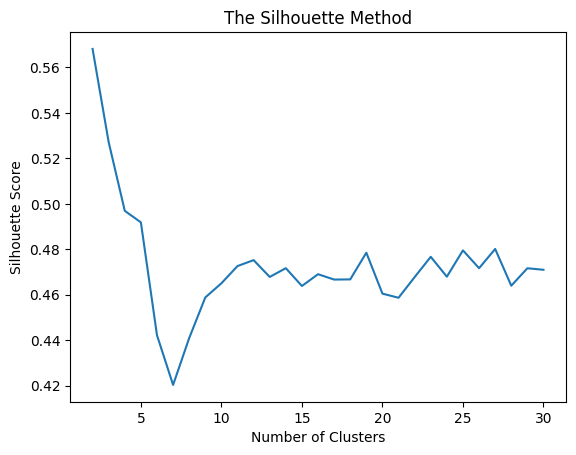

In [65]:
# Print Silhouette Score and Plot Silhouette Score and k
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2,31):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(skewed_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(skewed_data, labels))
    
for k in range(0, len(silhouette_scores)):
    print("Silhouette score for k = ", k+2, "is", silhouette_scores[k])
import matplotlib.pyplot as plt
plt.plot(range(2,31), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### According to the Elbow Method and Silhouette Method, the best k should be 12

## 3.2. Perform K-Means

D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


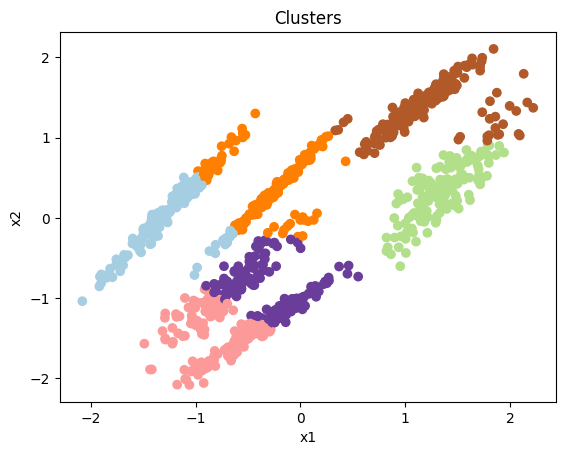

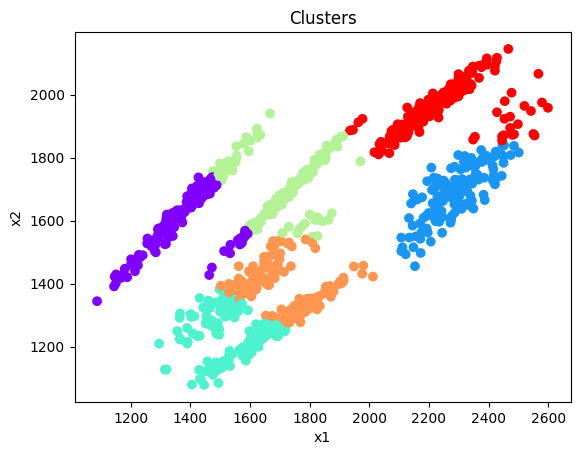

In [68]:
# Perform K-Means with k = 6 as we expect 6 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(skewed_data)

labels = kmeans.labels_
show_clusters(skewed_data, labels)
show_clusters_original_data(skewed_data, labels)

D:\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


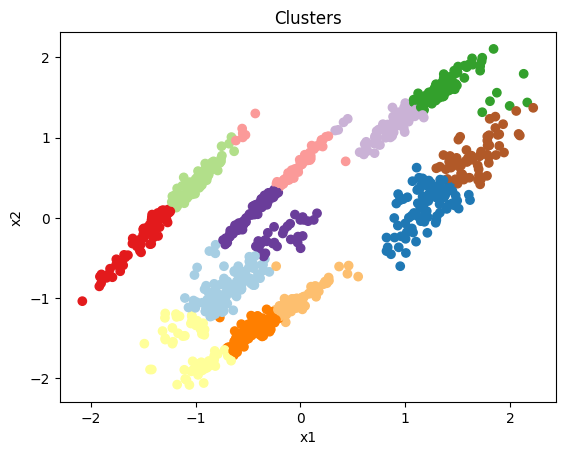

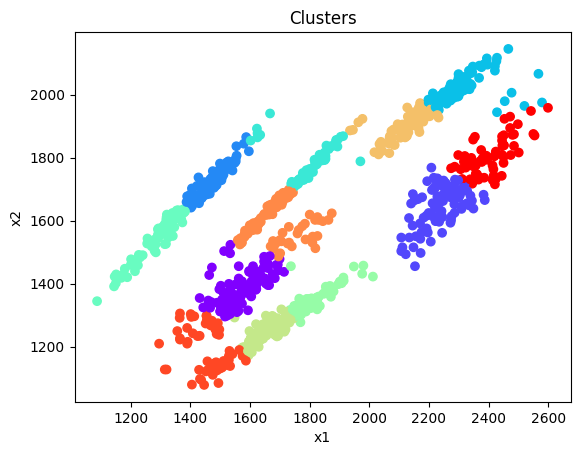

In [87]:
# Perform K-Means with k = 12 as for the elbow point and silhouette score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, init='k-means++')
kmeans.fit(skewed_data)

labels = kmeans.labels_
show_clusters(skewed_data, labels)
show_clusters_original_data(skewed_data, labels)

### The 6 clusters k means is not able to group the data well as there are some clusters that are not well seperated. The 12 clusters k means also does not group the data well since it didn't group the data as we expected in the beginning an some group has orange, purple and brown cluster data. Overall, DBSCAN is able to group the data better than K-Means for this dataset. Maybe because DBSCAN is able to group the data based on the density of the data points.